In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


In [14]:
train = pd.read_csv('data/training_variants')
trainingText = pd.read_csv('data/training_text', sep="\|\|", engine='python', header=None, names=["ID","Text"], skiprows=1)

test = pd.read_csv('data/test_variants')
testText = pd.read_csv('data/test_text', sep="\|\|", engine='python', header=None, names=["ID","Text"], skiprows=1)
pid = test['ID'].values

train = train.merge(trainingText, on='ID', how='left')
test = test.merge(testText, on='ID', how='left')
train["nbWords"] = train["Text"].apply(lambda x: len(str(x).split()) )

In [16]:
train.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                Text  nbWords  
0  Cyclin-dependent kinases (CDKs) regulate a var...     6089  
1   Abstract Background  Non-small cell lung canc...     5722  
2   Abstract Background  Non-small cell lung canc...     5722  
3  Recent evidence has demonstrated that acquired...     5572  
4  Oncogenic mutations in the monomeric Casitas B...     6202

In [18]:
globalDict = Counter([])
for article in train["Text"].values:
    words = str(article).split()
    currentDict = Counter(words)
    globalDict = globalDict + currentDict
    


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [24]:
len(globalDict)
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
#ps.stem(w)

In [29]:
all_words = []
for article in train["Text"][:1].values:
    word_tokens = word_tokenize(article)
    print('Not filtered %s' % len(word_tokens))
    word_tokens = [w.lower() for w in word_tokens if not w in stop_words]
    print('Filtered %s' % len(word_tokens))
    all_words = nltk.FreqDist(word_tokens)
    
print(all_words)
print('most commun %s', all_words.most_common(10))


Not filtered 7306
Filtered 5487
<FreqDist with 1501 samples and 5487 outcomes>
most commun %s [(',', 351), ('.', 325), ('(', 233), (')', 233), ('cyclin', 89), ('m', 89), ('cdk10', 77), ('fig', 63), ('we', 54), ('ets2', 53)]


In [41]:
def getTerms(sentences):
    tokens = nltk.word_tokenize(sentences)
    words = [w.lower() for w in tokens if not w in stop_words and  w.isalnum() ]

    return words

getTerms("hh, hh3h. wo shi 2 4 A . fdffdf. A&&B removing whitespaces and punctuations ")

['hh',
 'hh3h',
 'wo',
 'shi',
 '2',
 '4',
 'a',
 'fdffdf',
 'a',
 'b',
 'removing',
 'whitespaces',
 'punctuations']

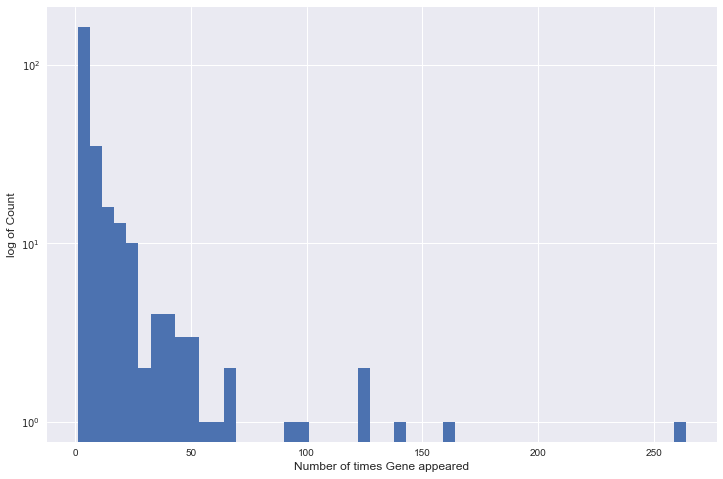

In [7]:

trainGenes = train.groupby('Gene')['Gene'].count()
# trainGenes.plot(kind='bar')
# plt.xlabel('Class Count', fontsize=5)
# plt.xticks(rotation=60)
# plt.show()


plt.figure(figsize=(12, 8))
plt.hist(trainGenes.values, bins=50, log=True)
plt.xlabel('Number of times Gene appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()


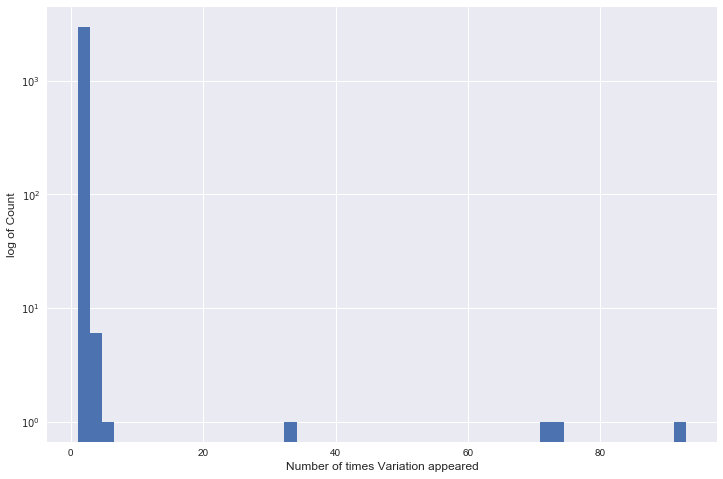

In [8]:
trainVariation = train.groupby('Variation')['Variation'].count()
plt.figure(figsize=(12, 8))
plt.hist(trainVariation.values, bins=50, log=True)
plt.xlabel('Number of times Variation appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

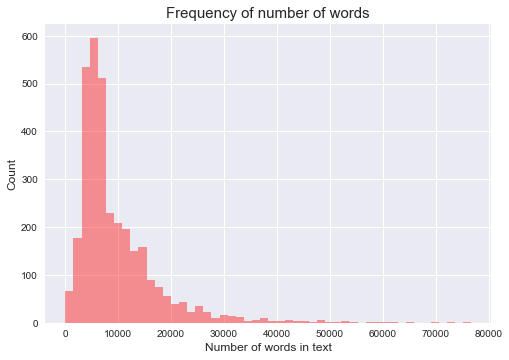

In [9]:
sns.distplot(train["nbWords"].values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

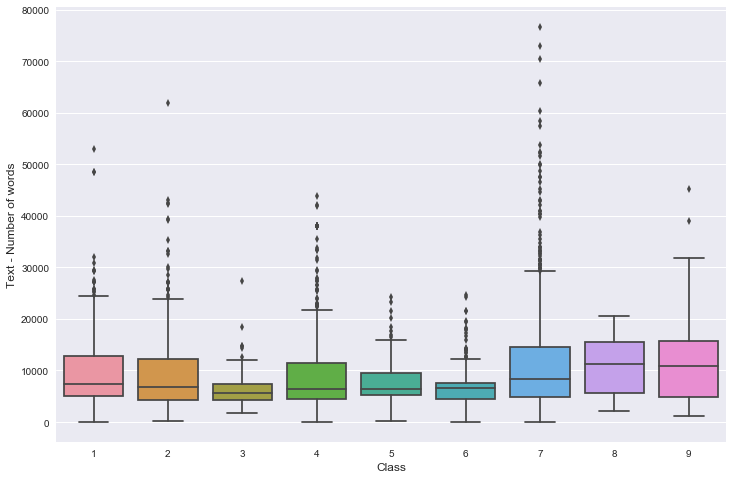

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='nbWords', data=train)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.show()

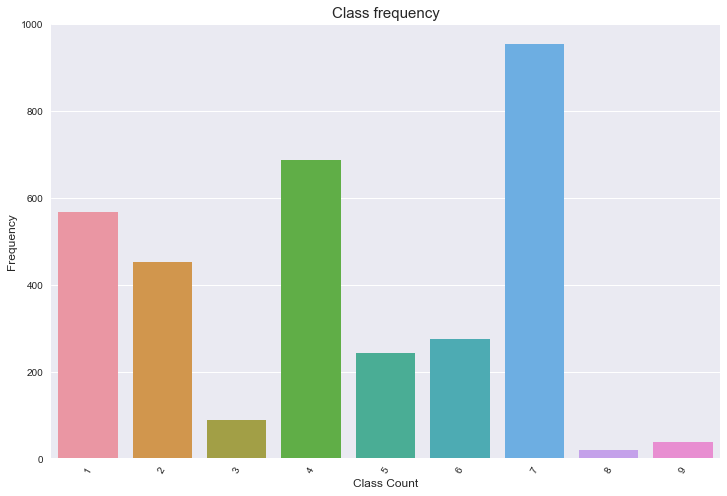

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation=60)
plt.title("Class frequency", fontsize=15)
plt.show()

In [12]:
# plt.figure(figsize=(12,8))
# plt.hist(train_genes, bins=50, log=True)
# plt.ylabel('log of count', fontsize=12)
# plt.xlabel('Genes distribution', fontsize=12)
# plt.xticks(rotation=60)
# plt.title("Gene frequency", fontsize=15)
# plt.show()

print('done')test_text', sep="\|\|", engine='python', header=None, names=["ID","Text"], skiprows=1)
pid = test['ID'].values

train = train.merge(trainingText, on='ID', how='left')
train["nbWords"] = train["Text"].apply(lambda x: len(str(x).split()) )


trainGenes = train.groupby('Gene')['Gene'].count()

SyntaxError: invalid syntax (<ipython-input-12-686289b75539>, line 9)